## File contents:
- Finding center of gaussian parameters: to determine the average/middle of counts of all the bins; the highest point
- S dispersion for regions where the masks are 2, 3, 4 and 5 (region 1 had no points)
- Determining the gamma value for all the regions

In [3]:
#imports
import matplotlib.pyplot as plt
import matplotlib
import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt
import statistics as st
matplotlib.rcParams.update({'font.size': 12})


In [4]:
#read all fits files
hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
var_Q_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits', ext = 0) #Q variance
var_U_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits', ext = 0) #U variance
ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0) #polarization
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0) #polarized intensity
Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0) 
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0) #sigma
U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0) #variance in polarized intensity

In [13]:
#mask filter for polarized intensity
mask = np.logical_and(hill_data>0, polint_data>3*np.sqrt(var_polint_data))
s = S_data[np.logical_not(np.isnan(S_data))]            #removing all nan
s_median = np.logical_and(S_data<st.median(s), mask)    #filter out high S dispersion

i_good = mask.nonzero()                                 #filter out 0 values
p_good = p_data[i_good]                                 #create polarization mask

s_good = p_data[s_median]

/var/folders/bb/r56hppg12fn6k8mzjncdy1b00000gn/T/ipykernel_56175/2484208341.py:11: RuntimeWarning: invalid value encountered in arccos
  gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
/var/folders/bb/r56hppg12fn6k8mzjncdy1b00000gn/T/ipykernel_56175/2484208341.py:12: RuntimeWarning: invalid value encountered in arccos
  gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]


Text(0, 0.5, 'Counts')

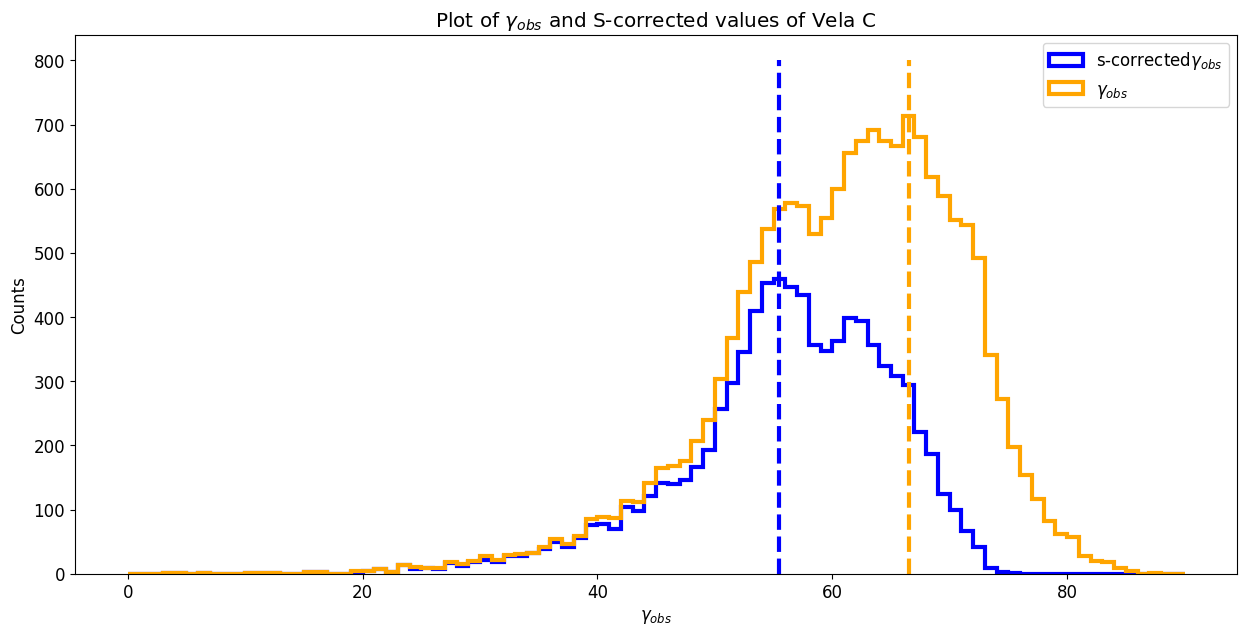

In [14]:
#plotting data from mask of gamma and S-corrected values
plt.figure(figsize = (15, 7))
y = np.linspace(0,800)
xs = [55.5]*len(y)
xp = [66.5]*len(y)
mxs = [st.median(s)*180/np.pi]*len(y)
mxp = [st.median(p_good)*180/np.pi]*len(y)

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gammas = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good]
gammap = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good]

hists, bins, patches = plt.hist(gammas, 90, range= (0,90), color = 'blue', histtype = 'step', label = 's-corrected$\gamma_{obs}$', lw = 3)
histp, bins, patches = plt.hist(gammap, 90, range= (0,90), color = 'orange', histtype = 'step', label = '$\gamma_{obs}$', lw = 3)
plt.plot(xs, y, '--', color = 'blue', lw = 3)
plt.plot(xp, y, '--', color = 'orange', lw = 3)

plt.legend()
plt.title('Plot of $\gamma_{obs}$ and S-corrected values of Vela C')
plt.xlabel('$\gamma_{obs}$')
plt.ylabel('Counts')

## Finding center using gaussian parameters

[55.5]
[66.5]


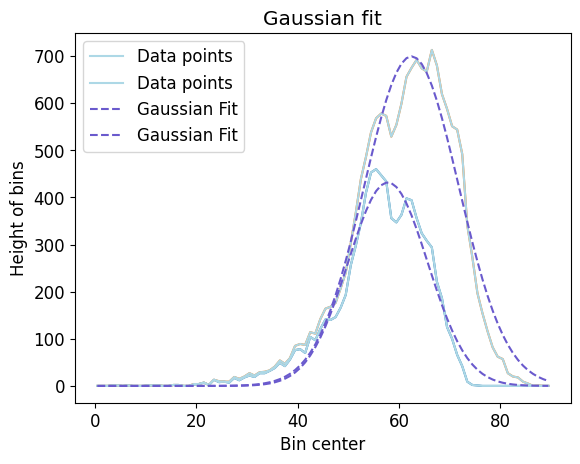

In [15]:
gausss = np.zeros(len(bins)-1)                #array of zeroes for bincenter
gaussp = np.zeros(len(bins)-1)  

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    gausss[m] = (0.5*(bins[m]+bins[m+1]))
    gaussp[m] = (0.5*(bins[m]+bins[m+1]))

plt.plot(gausss, hists)                        #Plotting of histogram as a line graph
plt.plot(gaussp, histp)                        #Plotting of histogram as a line graph
plt.title('Line graph of histogram')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')
plt.grid()

def gaussian(x, *p):                                       #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     
gPars,gCovs = opt.curve_fit(gaussian, gausss, hists,p0=(1,1,2))#fitting the data points
gParp,gCovp = opt.curve_fit(gaussian, gaussp, histp,p0=(1,1,2))#fitting the data points


gaussfits = gaussian(gausss, gPars[0], gPars[1], gPars[2])
gaussfitp = gaussian(gaussp, gParp[0], gParp[1], gParp[2])


#plotting the Gaussian fit
plt.plot(gausss, hists, '-', color = 'lightblue', label = 'Data points')
plt.plot(gausss, histp, '-', color = 'lightblue', label = 'Data points')
plt.plot(gaussp, gaussfits, '--',color = 'slateblue', label = 'Gaussian Fit')
plt.plot(gaussp, gaussfitp, '--',color = 'slateblue', label = 'Gaussian Fit')

plt.legend(loc = 'upper left')
plt.title('Gaussian fit')
plt.xlabel('Bin center')
plt.ylabel('Height of bins')

print(gausss[np.where(hists == hists.max())])
print(gaussp[np.where(histp == histp.max())])

plt.grid()


# S dispersion for $<S>\,>S$ for all subregions 

In [16]:
mask1 = np.logical_and(hill_data==1, polint_data>3*np.sqrt(var_polint_data))
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))

## Region where mask val = 2

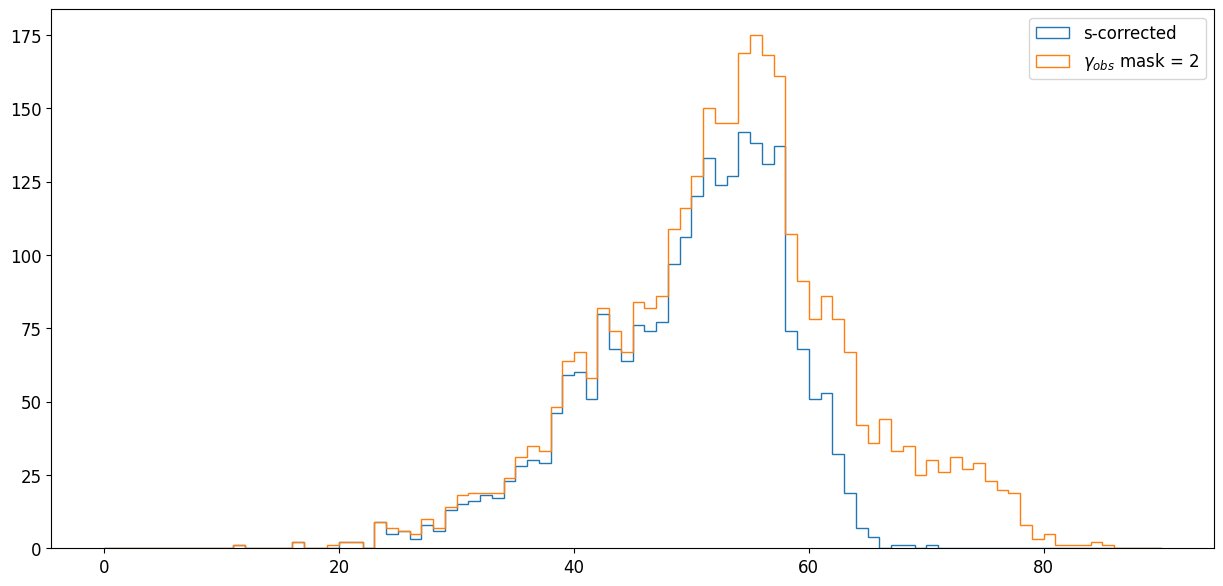

In [17]:
plt.figure(figsize = (15, 7))

s_median2 = np.logical_and(S_data<st.median(s), mask2)
s_good2 = p_data[s_median2]
gammas2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good2]
hists2, bins, patches = plt.hist(gammas2, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good2 = mask2.nonzero()
p_good2 = p_data[i_good2]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90), histtype = 'step', label = '$\gamma_{obs}$ mask = 2')
plt.legend()

## Region where mask val = 3

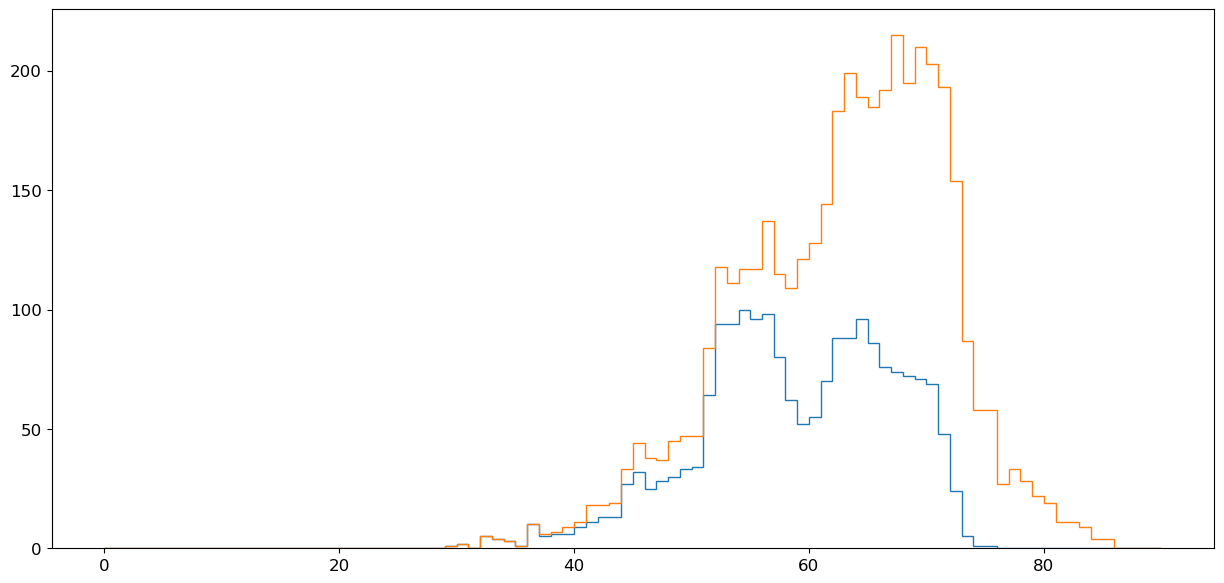

In [14]:
plt.figure(figsize = (15, 7))

s_median3 = np.logical_and(S_data<st.median(s), mask3)
s_good3 = p_data[s_median3]
gammas3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good3]
hists3, bins, patches = plt.hist(gammas3, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good3 = mask3.nonzero()
p_good3 = p_data[i_good3]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90), histtype = 'step', label = 'mask = 3')
#plt.legend()

## Region where mask val = 4

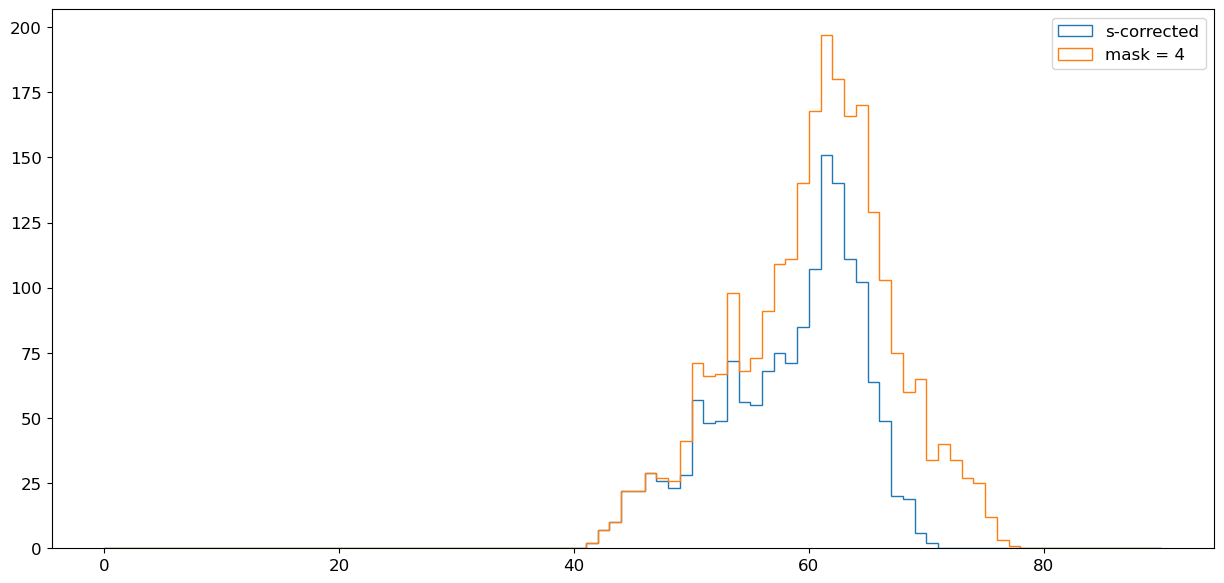

In [15]:
plt.figure(figsize = (15, 7))

s_median4 = np.logical_and(S_data<st.median(s), mask4)
s_good4 = p_data[s_median4]
gammas4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good4]
hists4, bins, patches = plt.hist(gammas4, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good4 = mask4.nonzero()
p_good4 = p_data[i_good4]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90), histtype = 'step', label = 'mask = 4')
plt.legend()

## Region where mask val = 5

/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_46903/3114356658.py:5: RuntimeWarning: invalid value encountered in arccos
  gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
/var/folders/lp/bh247h21459_r2sf0dzyrx_w0000gn/T/ipykernel_46903/3114356658.py:10: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


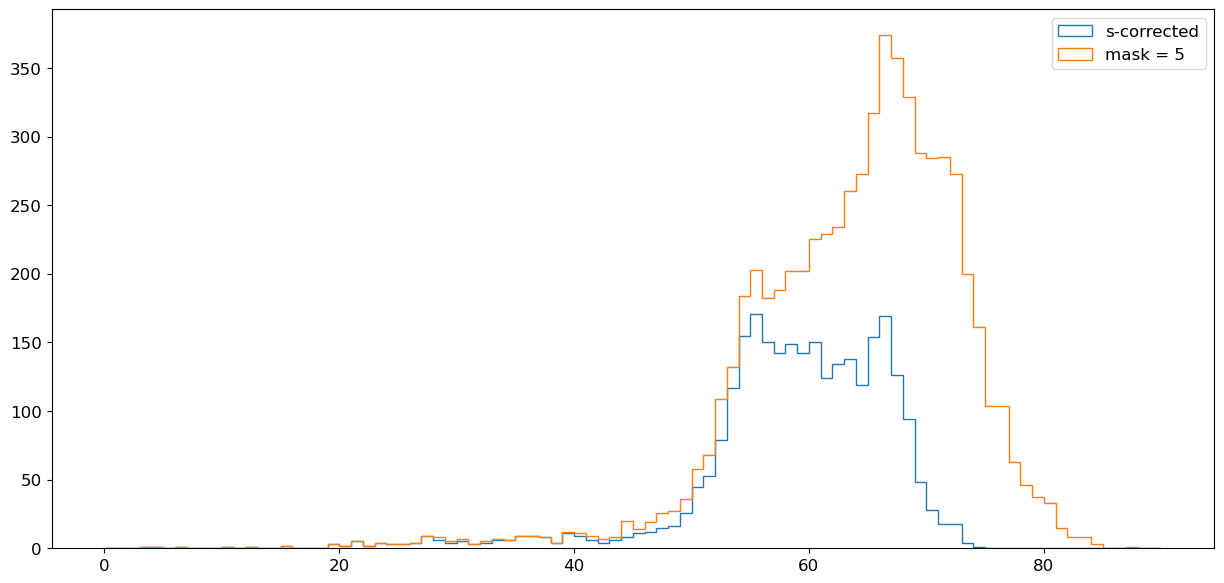

In [16]:
plt.figure(figsize = (15, 7))

s_median5 = np.logical_and(S_data<st.median(s), mask5)
s_good5 = p_data[s_median5]
gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]
hists5, bins, patches = plt.hist(gammas5, 90, range= (0,90),  histtype = 'step', label = 's-corrected')

i_good5 = mask5.nonzero()
p_good5 = p_data[i_good5]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90), histtype = 'step', label = 'mask = 5')
plt.legend()

# Determining gamma value distributions for all regions

In [18]:
#mask0 = np.logical_and(hill_data==0, polint_data>3*np.sqrt(var_polint_data))
mask1 = np.logical_and(hill_data==1, polint_data>3*np.sqrt(var_polint_data))
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))

s_median1 = np.logical_and(S_data<st.median(s_good), mask1)
s_median2 = np.logical_and(S_data<st.median(s_good), mask2)
s_median3 = np.logical_and(S_data<st.median(s_good), mask3)
s_median4 = np.logical_and(S_data<st.median(s_good), mask4)
s_median5 = np.logical_and(S_data<st.median(s_good), mask5)

#i_good0 = mask0.nonzero()
i_good1 = mask1.nonzero()
i_good2 = mask2.nonzero()
i_good3 = mask3.nonzero()
i_good4 = mask4.nonzero()
i_good5 = mask5.nonzero()

s_good1 = p_data[s_median1]
s_good2 = p_data[s_median2]
s_good3 = p_data[s_median3]
s_good4 = p_data[s_median4]
s_good5 = p_data[s_median5]


#p_good0 = p_data[i_good0]
p_good1 = p_data[i_good1]
p_good2 = p_data[i_good2]
p_good3 = p_data[i_good3]
p_good4 = p_data[i_good4]
p_good5 = p_data[i_good5]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

#gamma0 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good0]
gamma1 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good1]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]

gammas1 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good1]
gammas2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good2]
gammas3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good3]
gammas4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good4]
gammas5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in s_good5]


/var/folders/bb/r56hppg12fn6k8mzjncdy1b00000gn/T/ipykernel_56175/3703323143.py:43: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


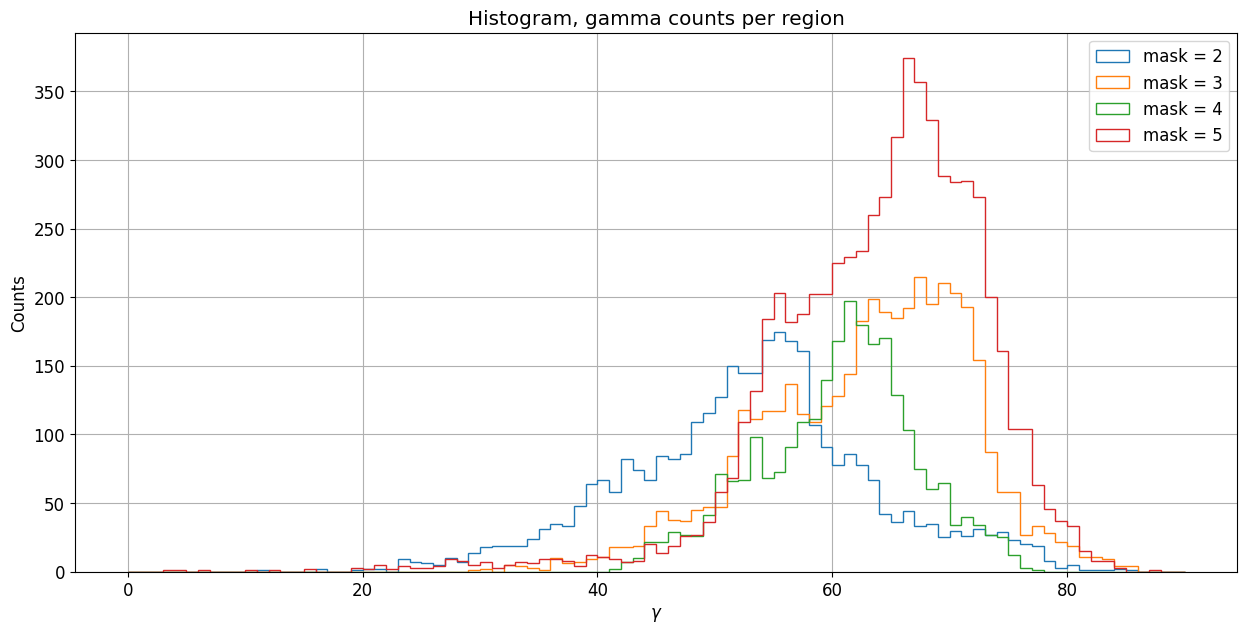

In [19]:
plt.figure(figsize = (15, 7))
#hist0, bins, patches = plt.hist(gamma0, 90, histtype = 'step', label = 'mask = 0')
#hist1, bins, patches = plt.hist(gamma1, 90, histtype = 'step', label = 'mask = 1')
hist2, bins, patches = plt.hist(gamma2, 90, range= (0,90), histtype = 'step', label = 'mask = 2')
hist3, bins, patches = plt.hist(gamma3, 90, range= (0,90), histtype = 'step', label = 'mask = 3')
hist4, bins, patches = plt.hist(gamma4, 90, range= (0,90), histtype = 'step', label = 'mask = 4')
hist5, bins, patches = plt.hist(gamma5, 90, range= (0,90), histtype = 'step', label = 'mask = 5')

plt.title('Histogram, gamma counts per region')
plt.xlabel('$\gamma$')
plt.ylabel('Counts')
plt.legend()
plt.grid()
#plt.savefig('histogram')